 **EXPLORATION ET VISUALISATION**

In [23]:
import os
import cv2

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
path = r"C:\Users\4799XA\OneDrive\Formation DATASCIENCE\Projet DATA SCIENCE\code\fcdspneumonie\fcdspneumonie"

In [3]:
fichier = 'data.csv'

df = pd.read_csv(fichier, sep=';')

df.head()

,fichier,format,rep1,rep2,pathogen,height,width,size,mode,mean,median,std,seuil100
0,IM-0001-0001.jpeg,JPEG,test,NORMAL,NaN,1317,1857,2445669,L,131.00,132.0,57.10,70.70
1,IM-0003-0001.jpeg,JPEG,test,NORMAL,NaN,1509,2111,3185499,L,142.45,150.0,60.67,77.07
2,IM-0005-0001.jpeg,JPEG,test,NORMAL,NaN,1837,2031,3730947,L,136.25,138.0,55.40,75.37
3,IM-0006-0001.jpeg,JPEG,test,NORMAL,NaN,1326,1663,2205138,L,148.67,152.0,42.32,84.65
4,IM-0007-0001.jpeg,JPEG,test,NORMAL,NaN,1818,2053,3732354,L,137.70,137.0,53.97,75.99


In [6]:
# Reconstituer le chemin de chaque fichier
df['path'] = path

df['path'] = df['path'].str.cat([df['rep1'], df['rep2'], df['fichier']], sep = os.sep)

In [8]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 14 columns):
fichier     5856 non-null object
format      5856 non-null object
rep1        5856 non-null object
rep2        5856 non-null object
pathogen    4273 non-null object
height      5856 non-null int64
width       5856 non-null int64
size        5856 non-null int64
mode        5856 non-null object
mean        5856 non-null float64
median      5856 non-null float64
std         5856 non-null float64
seuil100    5856 non-null float64
path        5856 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 640.6+ KB


,fichier,format,rep1,rep2,pathogen,height,width,size,mode,mean,median,std,seuil100,path
0,IM-0001-0001.jpeg,JPEG,test,NORMAL,NaN,1317,1857,2445669,L,131.00,132.0,57.10,70.70,C:\Users\4799XA\OneDrive\Formation DATASCIENCE...
1,IM-0003-0001.jpeg,JPEG,test,NORMAL,NaN,1509,2111,3185499,L,142.45,150.0,60.67,77.07,C:\Users\4799XA\OneDrive\Formation DATASCIENCE...
2,IM-0005-0001.jpeg,JPEG,test,NORMAL,NaN,1837,2031,3730947,L,136.25,138.0,55.40,75.37,C:\Users\4799XA\OneDrive\Formation DATASCIENCE...
3,IM-0006-0001.jpeg,JPEG,test,NORMAL,NaN,1326,1663,2205138,L,148.67,152.0,42.32,84.65,C:\Users\4799XA\OneDrive\Formation DATASCIENCE...
4,IM-0007-0001.jpeg,JPEG,test,NORMAL,NaN,1818,2053,3732354,L,137.70,137.0,53.97,75.99,C:\Users\4799XA\OneDrive\Formation DATASCIENCE...


---

**i) Les données sont déjà réparties dans 3 répertoires principaux: test, train et val**

Voici la répartition obtenue en nombre de fichiers (5856 au total):

In [9]:
soustotal = df[['fichier', 'rep1']].groupby('rep1').agg('count')

soustotal['pourcentage'] = round(soustotal / soustotal.sum() * 100, 2)

soustotal

,fichier,pourcentage
rep1,,
test,624,10.66
train,5216,89.07
val,16,0.27


On trouve actuellement environ 89 % dans le 'train' et 10.7 % pour train

**ii) Dans chaque répertoire principal, les données sont aussi classées dans 2 répertoires NORMAL et PNEUMONIA en guise de label**

Voici la répartition obtenue globalement:

In [10]:
df[['fichier', 'rep2']].groupby('rep2').agg('count')  

,fichier
rep2,
NORMAL,1583
PNEUMONIA,4273


Il y a presque 3 fois plus de cas de pneumonie que de cas normaux. S'agissant de données médicales, cela parait cohérent.

A noter: dans les répertoires 'PNEUMONIA', les fichiers comportent les chaines 'virus' ou 'bacteria' (exemple "person88_bacteria_438"):

In [11]:
pneumonia = df[df['rep2'] == 'PNEUMONIA']

pneumo = pneumonia[['fichier', 'pathogen']].groupby('pathogen').agg('count') 

pneumo['pourcentage'] = round(pneumo / pneumo.sum() * 100, 2)

pneumo

,fichier,pourcentage
pathogen,,
bacteria,2780,65.06
virus,1493,34.94


On a donc 65% de cas 'bactérie' et 35% de cas 'virus'

**iii) On peut également faire quelques analyses sur la taille des images en pixels:**

In [12]:
print('Hauteur moyenne :', round(df['height'].mean(), 2))
print('Hauteur min :', df['height'].min())
print('Hauteur max :', df['height'].max())

print()

print('Largeur moyenne :', round(df['width'].mean(), 2))
print('Largeur min :', df['width'].min())
print('Largeur max: ', df['width'].max())

Hauteur moyenne : 970.69
Hauteur min : 127
Hauteur max : 2713

Largeur moyenne : 1327.88
Largeur min : 384
Largeur max:  2916


- hauteurs comprises entre 127 et 2713, avec une moyenne de 971 pixels environ

- largeurs comprises entre 384 et 2916, avec une moyenne de 1328 pixels environ

On note donc des formats d'image très variables. On a des images présentant des poumons entiers, mais également parfois incomplètes (le haut et le bas des poumons n'apparait pas)

Représentation sous forme de nuage de points:

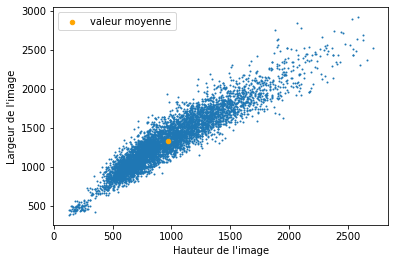

In [14]:
plt.scatter(df['height'], df['width'], s = 1)
plt.scatter(df['height'].mean(), df['width'].mean(), color = 'orange', s = 20, label = 'valeur moyenne')
plt.xlabel("Hauteur de l'image")
plt.ylabel("Largeur de l'image")
plt.legend()
plt.show() 

L'image la plus petite mesure 127 x 384 pixels:

In [15]:
df[df['size'] == df['size'].min()]  

,fichier,format,rep1,rep2,pathogen,height,width,size,mode,mean,median,std,seuil100,path
4306,person407_virus_811.jpeg,JPEG,train,PNEUMONIA,virus,127,384,48768,RGB,123.56,129.0,40.16,83.45,C:\Users\4799XA\OneDrive\Formation DATASCIENCE...


L'image la plus grande mesure 2583 x 2916 pixels:

In [16]:
df[df['size'] == df['size'].max()] 

,fichier,format,rep1,rep2,pathogen,height,width,size,mode,mean,median,std,seuil100,path
1858,NORMAL2-IM-1257-0001.jpeg,JPEG,train,NORMAL,NaN,2583,2916,7532028,L,147.21,164.0,77.54,74.07,C:\Users\4799XA\OneDrive\Formation DATASCIENCE...


**iv) Images niveaux de gris / couleur / channels**

In [17]:
df['format'].value_counts()

JPEG    5856
Name: format, dtype: int64

Toutes les images sont au format JPEG.

In [18]:
df[['fichier', 'mode']].groupby('mode').agg('count')

,fichier
mode,
L,5573
RGB,283


avec 'L' (8-bit pixels, black and white) et 'RGB' (3x8-bit pixels, true color).

Les images sont majoritairement en noir et blanc (283 sont en couleur).

**v) Planche contact**

Affichage au hasard (samples) de 5 images NORMAL et 5 images PNEUMONIA

TypeError: Image data of dtype object cannot be converted to float

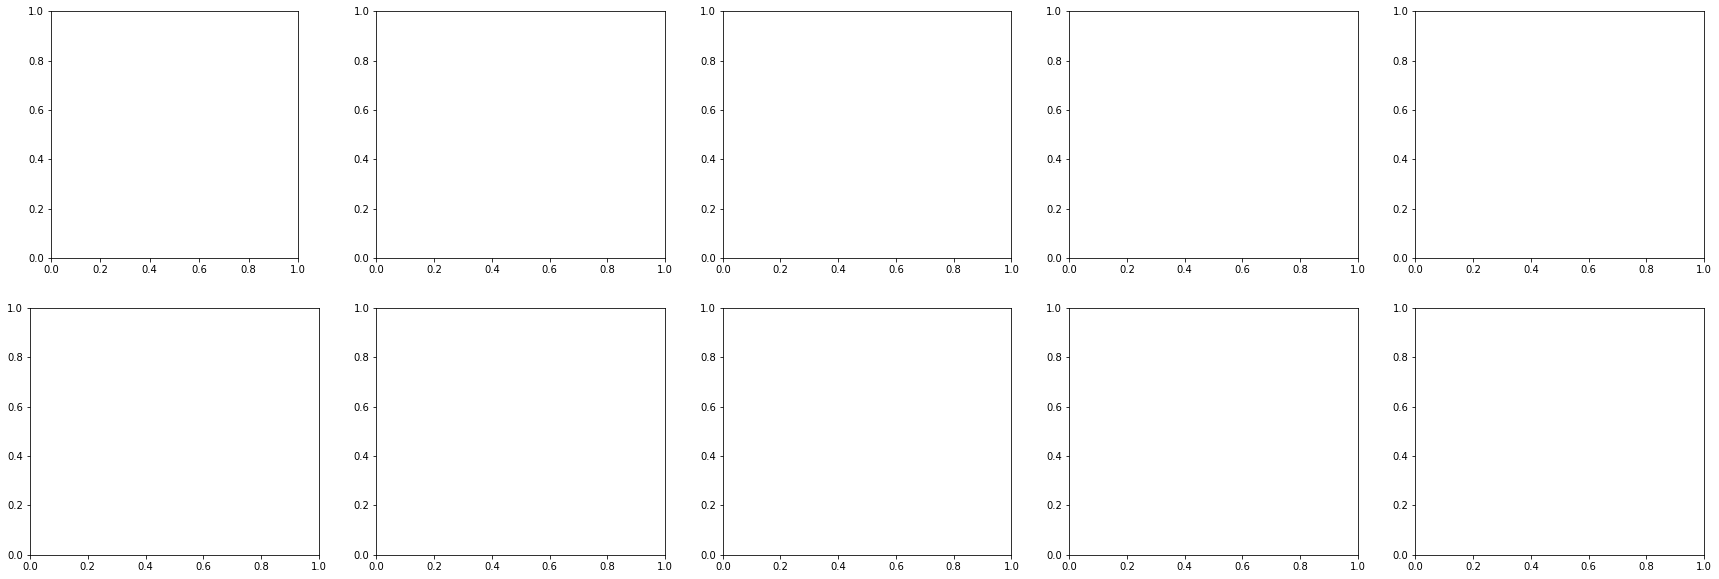

In [19]:
list_images = []

df_normal = df[df['rep2'] == 'NORMAL']

for i in df_normal.sample(n = 5)['path']:
    list_images.append(i)

df_pneumonia = df[df['rep2'] == 'PNEUMONIA']

for i in df_pneumonia.sample(n = 5)['path']:
    list_images.append(i)

f, ax = plt.subplots(2, 5, figsize=(30, 10))

for i in range(10):
    
    img = cv2.imread(list_images[i])
    
    lig = i // 5
    col = i % 5
    
    ax[lig, col].imshow(img)
    
    if i < 5:
        ax[lig, col].set_title("Normal")
    else:
        ax[lig, col].set_title("Pneumonie")
        
    ax[lig, col].axis('off')
    ax[lig, col].set_aspect('auto')
    
plt.show()     

**vi) Histogrammes**

On affiche ci-dessous l'histogramme correspondant aux images de la planche contact. Sont également indiquées les valeurs moyennes et médianes.

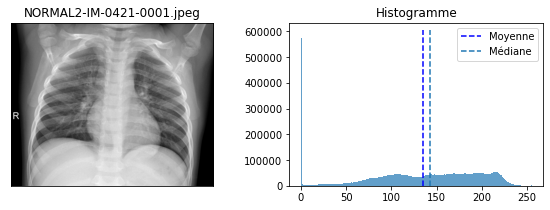

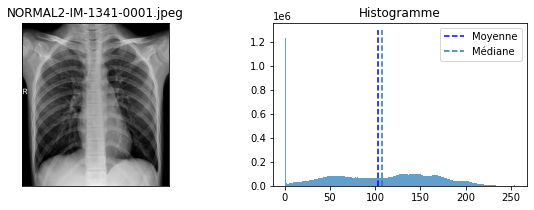

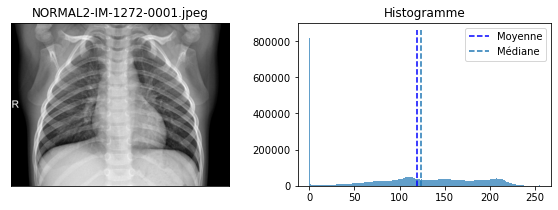

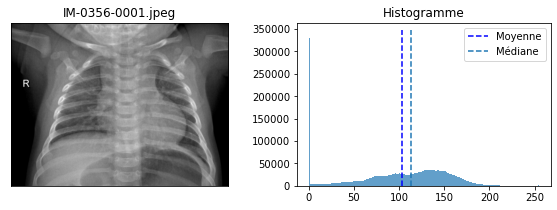

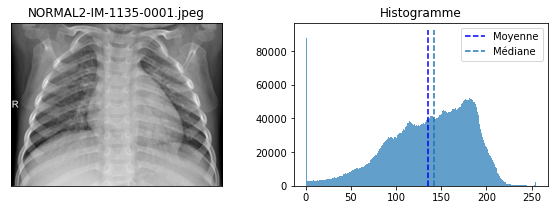

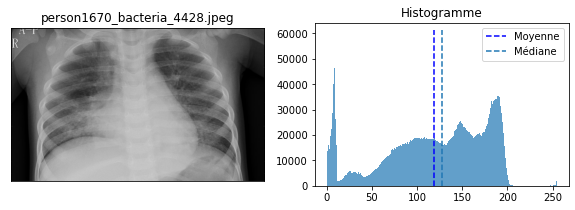

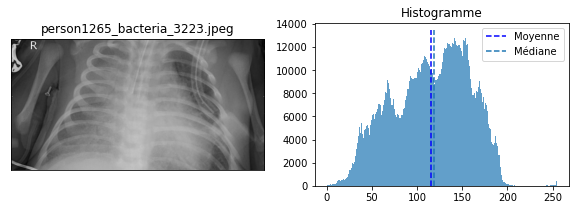

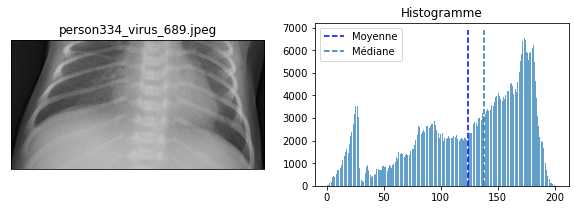

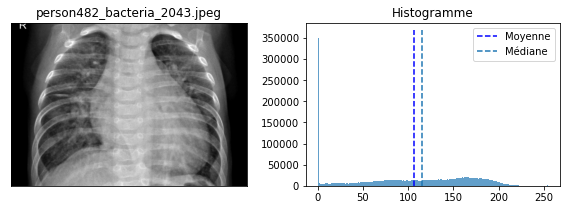

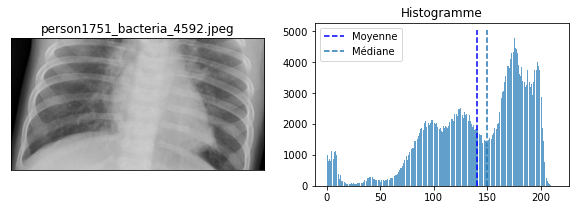

In [61]:
def show_image(image_path):

    img = cv2.imread(image_path)

    titre = os.path.split(image_path)[1]    

    fig = plt.figure(figsize=(10, 3))

    ax = fig.add_subplot(121) # ------------------------
    
    ax.set_title(titre)
    ax.set_aspect('auto')
    ax.set_xticks([])
    ax.set_yticks([])    
    
    ax.imshow(img)
    
    ax = fig.add_subplot(122)
    
    ax.hist(img.ravel(), bins = 256, alpha = 0.7)
    ax.set_title('Histogramme')
    
    bottom, top = plt.ylim() # --------------------------   
    
    ax.vlines(x = np.mean(img), 
              ymin = bottom, ymax = top,
              color = 'blue',
              label = 'Moyenne',
              linestyles  = 'dashed')
    
    ax.vlines(x = np.median(img), 
              ymin = bottom, ymax = top,
              label = 'Médiane',
              linestyles  = 'dashed')    

    ax.set_aspect('auto')    
    
    ax.legend()
    
    plt.show()  
    

for image_path in list_images:
    # print(image_path)
    show_image(image_path)

**vii) Analyse des valeurs seuil**

La valeur seuil a été fixée à 100.

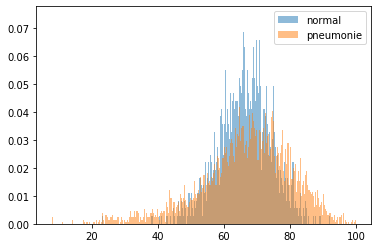

In [28]:
# sample_normal = df_normal['seuil100'].sample(1500)
sample_normal = df_normal['seuil100']

plt.hist(sample_normal, bins = 300, density = True,
         label = 'normal', alpha = 0.5)

# sample_pneumonia = df_pneumonia['seuil100'].sample(1500)
sample_pneumonia = df_pneumonia['seuil100']

plt.hist(sample_pneumonia, bins = 300, density = True,
         label = 'pneumonie', alpha = 0.5)

plt.legend();

In [27]:
sample_normal


0       70.70
1       77.07
2       75.37
3       84.65
4       75.99
5       80.97
6       74.90
7       77.57
8       74.40
9       73.03
10      77.93
11      79.33
12      74.67
13      79.24
14      75.63
15      84.89
16      38.08
17      75.06
18      73.28
19      79.65
20      72.15
21      83.07
22      57.54
23      74.72
24      78.48
25      80.83
26      77.68
27      71.50
28      78.23
29      79.56
        ...  
1943    64.86
1944    67.34
1945    63.89
1946    66.74
1947    71.84
1948    71.76
1949    73.74
1950    75.48
1951    58.79
1952    72.05
1953    68.38
1954    75.22
1955    72.42
1956    56.18
1957    62.11
1958    69.47
1959    76.14
1960    68.93
1961    62.30
1962    60.36
1963    69.75
1964    47.07
5840    78.63
5841    76.77
5842    81.07
5843    54.49
5844    68.56
5845    74.92
5846    42.44
5847    47.48
Name: seuil100, Length: 1583, dtype: float64

In [24]:
import scipy.stats as stats

In [25]:
# Comparaison de variances

print(sample_pneumonia.std())
print(sample_normal.std())

# Comparaison de moyennes

print(sample_pneumonia.mean())
print(sample_normal.mean())

13.72674573636053
8.147483930248432
66.76422185817944
66.33647504737844


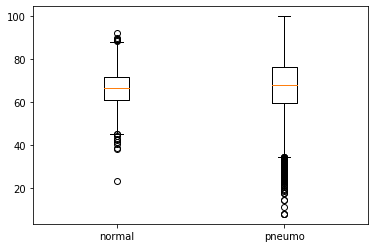

In [26]:
plt.boxplot([sample_normal, sample_pneumonia], labels = ['normal', 'pneumo']);